In [1]:
#import libraries and load dataset

import pandas as pd
import numpy as np

df = pd.read_csv("Fish_tanzania.csv")



In [5]:
# Data inspection
df.head(10)
df.tail(10)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Species       200 non-null    object 
 1   Weight_grams  190 non-null    float64
 2   Length_cm     190 non-null    float64
 3   Width_cm      200 non-null    float64
 4   Market        190 non-null    object 
 5   Price_TZS     200 non-null    float64
dtypes: float64(4), object(2)
memory usage: 9.5+ KB


,Weight_grams,Length_cm,Width_cm,Price_TZS
count,190.000000,190.000000,200.000000,200.000000
mean,2458.139000,57.952895,16.684800,16187.880100
std,1458.915907,24.064679,7.338083,10694.182499
min,224.300000,15.780000,5.300000,925.640000
25%,1106.590000,36.242500,9.520000,6732.785000
50%,2419.245000,59.885000,16.150000,15224.580000
75%,3717.565000,76.615000,22.807500,23453.820000
max,4983.860000,99.150000,29.760000,50758.550000


In [6]:
# Checking the missing value

df.isnull().sum()

Species          0
Weight_grams    10
Length_cm       10
Width_cm         0
Market          10
Price_TZS        0
dtype: int64

In [9]:
# Fill missing value(weight_grams)
df["Weight_grams"]
df["Weight_grams"].fillna(df["Weight_grams"].mean())



0      1997.790
1       948.890
2      3085.350
3      4195.720
4      1660.360
         ...   
195    2419.245
196    1071.670
197    2417.630
198    2628.270
199    4674.170
Name: Weight_grams, Length: 200, dtype: float64

In [10]:
# Fill missing value(Length_cm)
df["Length_cm"]
df["Length_cm"].fillna(df["Length_cm"].median())

0      95.810
1      28.260
2      75.190
3      33.050
4      59.600
        ...  
195    61.130
196    92.220
197    59.885
198    66.970
199    63.040
Name: Length_cm, Length: 200, dtype: float64

In [14]:
# Check market mode
df["Market"].mode()



0    Dodoma
Name: Market, dtype: object

In [15]:
#Fill missing value(market)
df["Market"]
df["Market"].fillna(df["Market"].mode()[0])


0             Dodoma
1             Dodoma
2              Mbeya
3             Mwanza
4             Arusha
           ...      
195    Dar es Salaam
196           Mwanza
197            Mbeya
198           Dodoma
199           Dodoma
Name: Market, Length: 200, dtype: object

In [17]:
df.isnull().sum()

Species         0
Weight_grams    0
Length_cm       0
Width_cm        0
Market          0
Price_TZS       0
dtype: int64

In [20]:
# Encode categorical variable
df = pd.get_dummies(df, columns=["Species", "Market"], drop_first=True)


In [21]:
# Check a succesfull encoding categorical variable
df.head()

,Weight_grams,Length_cm,Width_cm,Price_TZS,Species_Dagaa,Species_Nile Perch,Species_Sardine,Species_Tilapia,Market_Dar es Salaam,Market_Dodoma,Market_Mbeya,Market_Mwanza
0,1997.79,95.81,23.30,13576.93,False,False,False,False,False,True,False,False
1,948.89,28.26,6.45,5047.12,True,False,False,False,False,True,False,False
2,3085.35,75.19,5.51,17083.00,True,False,False,False,False,False,True,False
3,4195.72,33.05,9.55,25615.86,False,False,False,True,False,False,False,True
4,1660.36,59.60,15.80,6826.70,True,False,False,False,False,False,False,False


In [25]:
df = df.astype(int)


In [26]:
df.head()

,Weight_grams,Length_cm,Width_cm,Price_TZS,Species_Dagaa,Species_Nile Perch,Species_Sardine,Species_Tilapia,Market_Dar es Salaam,Market_Dodoma,Market_Mbeya,Market_Mwanza
0,1997,95,23,13576,0,0,0,0,0,1,0,0
1,948,28,6,5047,1,0,0,0,0,1,0,0
2,3085,75,5,17083,1,0,0,0,0,0,1,0
3,4195,33,9,25615,0,0,0,1,0,0,0,1
4,1660,59,15,6826,1,0,0,0,0,0,0,0


In [27]:
# Definition of features and target
# Features
X = df.drop("Price_TZS", axis=1)

# Target
y = df["Price_TZS"]

# Check shapes
print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (200, 11)
Target shape: (200,)


In [28]:
# Train_split dataset
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,            # features & target
    test_size=0.2,   # 20% for testing, 80% for training
    random_state=42  # reproducible results
)

# Check shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (160, 11)
X_test shape: (40, 11)
y_train shape: (160,)
y_test shape: (40,)


Linear Regression R2 Score: 0.8787300164144071
Linear Regression RMSE: 3272.761285530703


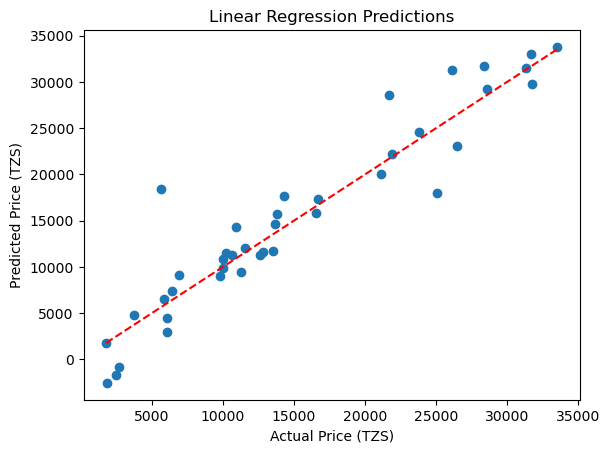

In [31]:
# ****..........LINEAR REGRESSION TRAINING.......***

        # 1.import model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

      # 2.Train the model
# Create Linear Regression object
lr_model = LinearRegression()

# Train model
lr_model.fit(X_train, y_train)

    # 3.Prediction
# Predict on test set
y_pred_lr = lr_model.predict(X_test)


   # 4.Evaluate perfomance 
from sklearn.metrics import r2_score, root_mean_squared_error

# R^2 score
r2 = r2_score(y_test, y_pred_lr)

# RMSE
rmse = root_mean_squared_error(y_test, y_pred_lr)

print("Linear Regression R2 Score:", r2)
print("Linear Regression RMSE:", rmse)


   # 5.Visualize prediction
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_lr)
plt.xlabel("Actual Price (TZS)")
plt.ylabel("Predicted Price (TZS)")
plt.title("Linear Regression Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line
plt.show()






Decision Tree R2 Score: 0.7297285272048362
Decision Tree RMSE: 4885.82349763067


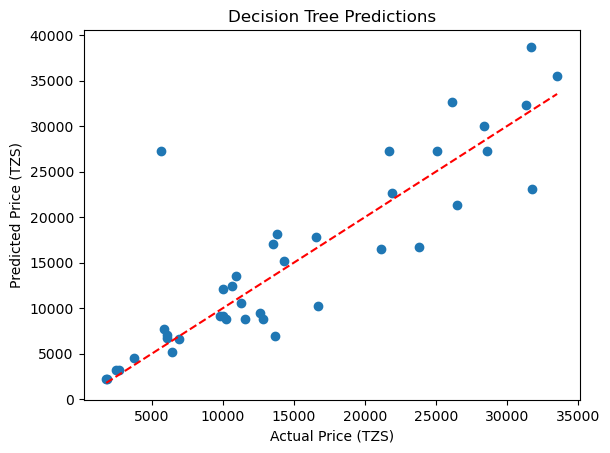

In [32]:
#*****................DECISION TREE TRAINING........******
      # 1.Import model
from sklearn.tree import DecisionTreeRegressor

     
       # 2.Create and train model
# Create Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Train on training data
dt_model.fit(X_train, y_train)


    # 3.Predict on test set
y_pred_dt = dt_model.predict(X_test)


   # 4.Perfomance evaluation
from sklearn.metrics import r2_score, root_mean_squared_error

r2_dt = r2_score(y_test, y_pred_dt)
rmse_dt = root_mean_squared_error(y_test, y_pred_dt)

print("Decision Tree R2 Score:", r2_dt)
print("Decision Tree RMSE:", rmse_dt)


   # 5.Visualize prediction
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_dt)
plt.xlabel("Actual Price (TZS)")
plt.ylabel("Predicted Price (TZS)")
plt.title("Decision Tree Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()






In [33]:
# *****.......COMPARE BEST MODEL......******
# Compare metrics
print("Linear Regression -> R2:", r2, ", RMSE:", rmse)
print("Decision Tree -> R2:", r2_dt, ", RMSE:", rmse_dt)

# Choose best model
best_model = dt_model if r2_dt > r2 else lr_model
print("Best model selected:", "Decision Tree" if best_model == dt_model else "Linear Regression")


Linear Regression -> R2: 0.8787300164144071 , RMSE: 3272.761285530703
Decision Tree -> R2: 0.7297285272048362 , RMSE: 4885.82349763067
Best model selected: Linear Regression


In [34]:
if r2 > r2_dt:
    best_model = lr_model
    print("Best model: Linear Regression")
else:
    best_model = dt_model
    print("Best model: Decision Tree")


Best model: Linear Regression


In [36]:
# Consider saving of
import joblib

# Save the best model (Linear Regression)
joblib.dump(best_model, "model.pkl")

print("Linear Regression model saved as model.pkl")



Linear Regression model saved as model.pkl


In [37]:
# LOAD MODEL EXAMPLE
# Load model
loaded_model = joblib.load("model.pkl")

# Test prediction
y_test_pred = loaded_model.predict(X_test[:5])  # predict for first 5 samples
print(y_test_pred)


[ 7364.76306582 15773.89889321 28643.13654386 22215.39653652
 31290.23723037]
